In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Dataset and its summary

Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, and 6 Very Accurate. You can also download this dataset from the following the link: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [2]:
df= pd.read_csv("bfi.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [5]:
# Dropping missing values rows
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [7]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


# Step 1: Adequacy Test

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test
Kaiser-Meyer-Olkin Test (KMO Test)

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.19955392497, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8482210116350438

The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

# Step 2: Choosing the Number of Factors

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [10]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

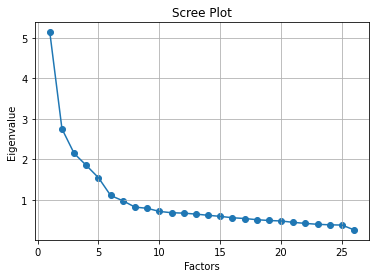

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

# Step 3: Performing Factor Analysis

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors = 6, rotation="varimax")
fa.fit(df)
loadings = fa.loadings_
print(loadings)

[[-0.02290301 -0.03247244  0.03316871 -0.03809335  0.00379506  0.10374847]
 [ 0.09939617  0.06047379  0.02669442 -0.53078469 -0.12030937  0.16363839]
 [ 0.03176731  0.259875    0.1402256   0.64656947  0.05577021 -0.09704963]
 [-0.00525556  0.40884857  0.10953353  0.58700379  0.01618433  0.03914857]
 [-0.07926603  0.25534237  0.22930808  0.39176034 -0.13629257  0.03340065]
 [-0.14364476  0.4910488   0.0856494   0.45108988  0.00911123  0.10588827]
 [ 0.00562295  0.12364715  0.54015019  0.00422137  0.18345833  0.13879815]
 [ 0.08435816  0.10650466  0.65249593  0.05653766  0.0792028   0.20858043]
 [-0.03394649  0.0497959   0.54587749  0.10028627 -0.0123717   0.05447959]
 [ 0.23161662  0.0089893  -0.67278538 -0.08998026 -0.15345088  0.22697701]
 [ 0.29340234 -0.14364361 -0.55970425 -0.04706994  0.0256143   0.09577897]
 [ 0.05310218 -0.52147723  0.02649196 -0.09054496 -0.05928098  0.33201867]
 [ 0.2631889  -0.62292324 -0.11075758 -0.07455019 -0.03044005  0.29120361]
 [ 0.00119     0.63056485

Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.